<a href="https://colab.research.google.com/github/alicepearse/DL_prac/blob/master/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
mnist = tf.keras.datasets.mnist

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255

In [9]:
x_train.shape

(60000, 28, 28)

In [12]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
  ])

In [15]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
# train the model
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2986 - accuracy: 0.9140 - val_loss: 0.1433 - val_accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1436 - accuracy: 0.9569 - val_loss: 0.1036 - val_accuracy: 0.9699
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1081 - accuracy: 0.9674 - val_loss: 0.0913 - val_accuracy: 0.9720
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0887 - accuracy: 0.9732 - val_loss: 0.0792 - val_accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0734 - accuracy: 0.9765 - val_loss: 0.0728 - val_accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0652 - accuracy: 0.9790 - val_loss: 0.0656 - val_accuracy: 0.9810
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0586 - accuracy: 0.9810 - val_loss: 0.0680 - val_accuracy:

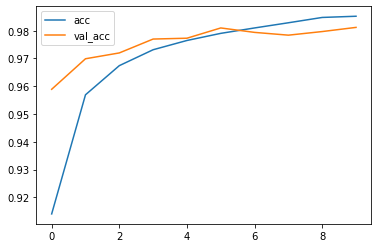

In [18]:
plt.plot(r.history['accuracy'], label = "acc")
plt.plot(r.history['val_accuracy'], label = "val_acc")
plt.legend()

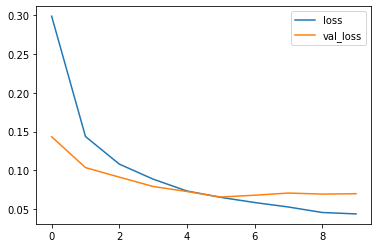

In [22]:
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [23]:
# Evaluate the model
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0699 - accuracy: 0.9812


[0.06993570923805237, 0.9811999797821045]

In [24]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

Confusion matrix, without normalization
[[ 971    0    1    2    0    1    3    1    1    0]
 [   0 1123    4    0    0    0    3    2    3    0]
 [   4    2 1008    2    2    0    2    7    5    0]
 [   0    0    0  992    0    3    0    9    3    3]
 [   0    0    4    0  961    0    5    2    0   10]
 [   2    0    0    9    1  869    5    1    3    2]
 [   2    2    1    1    1    3  947    0    1    0]
 [   2    2   10    1    0    0    0 1009    0    4]
 [   2    0    1    5    2    3    2    7  949    3]
 [   0    3    0    5    8    4    1    4    1  983]]


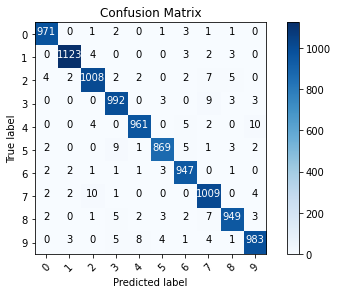

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

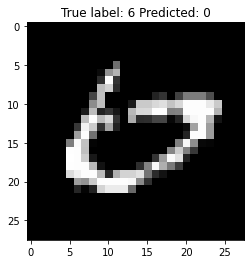

In [29]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));